In [1]:
import pandas as pd
import numpy as np
from fitter import Fitter
from scipy.stats import *
import matplotlib.pyplot as plt
import scipy.stats as stats    


In [2]:
import json
import numpy as np
import my_rand_lib as mr


fpath = './rand_seed_file'
with open(fpath,'r+') as f:
    results2 = json.load(f)

rand_seed = mr.get_numpy_seed(results2)
np.random.set_state(rand_seed)

print (np.random.rand(1))
print (np.random.rand(1))
print (np.random.rand(1))

[0.76022328]
[0.16086471]
[0.57942501]


Methodological explanation: Some of the index components were interpolated, some exterpolated. Up to 2016 I used interpolated numbers, after that extrapolated numbers. This is the data I got from Adriano's repository.

In [3]:
data = pd.read_csv("green_coin.csv", index_col=0)
data

,Value
Date,
1981,0.928587
1982,1.005902
1983,0.942771
1984,0.947301
1985,0.942701
1986,1.023383
1987,1.022825
1988,0.986488
1989,0.971993


In [4]:
our_std = np.std(data["Value"])/2  ### Divided by two because they will sum back up.
### Actually, we are just adding new deviation on top of the previous one. So in the end, we might divide it by 4.
### It will be too high anyway, but that's alright because we want to be cautious.
np.std(data["Value"])

0.12721378336512046

In [5]:
np.mean(data["Value"])

1.089065382675

In [6]:
### We assume that within a year (for the past values only), 
### the changes of values of data follow a normal distrubiton on quarterly basis.
### Mean will be (value_year - value_[year-1])/4 and std the general std of quarters times 1.25 (just to be cautios)
### So, when looking at the data, we will now go to 

In [7]:
data["year_change"] = data["Value"].diff()/data["Value"] ### So, we have non-linear growth in the end.
data

,Value,year_change
Date,,
1981,0.928587,NaN
1982,1.005902,0.076861
1983,0.942771,-0.066963
1984,0.947301,0.004782
1985,0.942701,-0.004879
1986,1.023383,0.078838
1987,1.022825,-0.000545
1988,0.986488,-0.036835
1989,0.971993,-0.014913


In [8]:
quarterly_mean = np.mean(data["year_change"].iloc[0:33])/4 ### To 33, because after that we were extrapolating.
quarterly_sd = np.std(data["year_change"].iloc[0:33])/4 ### We assume independent returns and then sum up the deviations.
print(quarterly_mean)
print(quarterly_sd)

0.0016744175624057302
0.009123806294472965


From the above we can already see that from 2013 on we always took 0.031093 increase of index. So, when creating the statistics, we will use mean and deviation only up to 2013.

In [10]:
yearly_values = data["Value"].values
monthly_values = [yearly_values[0]] ### We start with first year's value:
our_mean = yearly_values[1] - yearly_values[0]
gen_numbers = np.random.normal(loc=our_mean, scale=our_std,size=3) ### Generate numbers using normal distribution.
gen_numbers[0] = (1+ gen_numbers[0]) * yearly_values[0]
gen_numbers[1] = (1+gen_numbers[1]) * gen_numbers[0]
gen_numbers[2] = (1+gen_numbers[2]) * gen_numbers[1]
monthly_values = np.concatenate([monthly_values,gen_numbers])
i = 1
while i<=32: ### 33 before we get identical 0.031 updates that were extrapolated. We do not consider extrapolated values here.
    our_mean = ((yearly_values[i+1] - yearly_values[i])/yearly_values[i])/4
    print(our_mean)
    monthly_values = np.append(monthly_values,yearly_values[i]) ## Append next year
    gen_numbers = np.random.normal(loc=our_mean, scale=our_std,size=3)   ### 
    gen_numbers[0] = (1 + gen_numbers[0]) * yearly_values[i]
    gen_numbers[1] = (1 + gen_numbers[1]) * gen_numbers[0]
    gen_numbers[2] = (1 + gen_numbers[2]) * gen_numbers[1]
    
    ## Generate numbers using normal distribution. + yearly_values adds to sum up.
    monthly_values = np.concatenate([monthly_values,gen_numbers])
    i+=1
monthly_values = np.append(monthly_values,yearly_values[i]) ## Append next year
monthly_values

-0.015690042897001835
0.0012011527936472343
-0.001213801313302403
0.021396402202024378
-0.00013618997578850752
-0.008881637066174782
-0.003673430138025014
0.008517116918088867
0.007852515953754644
0.006564173336642906
0.008286000664582925
0.00548222499077084
-0.008321421313647914
-0.005413808914358309
0.0047946697977159485
0.01295574796102339
-0.003688248492731095
-0.017483856347577122
-0.0016461784379698142
0.0040868273499969155
0.0009776640663000397
-0.01507486374976052
-0.002064368023810225
0.0010964050985086636
-0.0010732137471761538
0.008477128222900504
0.0058063051242089915
0.006410735572692084
0.004674911969441212
0.0025351985239470396
0.01717952593184977
0.013261964298143799


array([0.92858697, 0.96973763, 1.00660266, 1.16467226, 1.00590154,
       0.92874958, 0.83746874, 0.75523689, 0.94277098, 0.92131634,
       0.86427338, 0.87081043, 0.94730063, 0.88579817, 0.90237057,
       0.80081973, 0.94270129, 1.07449812, 1.03700366, 1.11437445,
       1.02338296, 1.08391951, 1.06470156, 1.05935907, 1.02282546,
       1.05696759, 1.0414982 , 1.03198375, 0.986488  , 0.94339692,
       0.98789302, 0.94234673, 0.97199282, 1.0112796 , 0.97415713,
       0.97847256, 1.00510713, 1.05810277, 0.90346049, 0.95911463,
       1.03667761, 1.08224162, 1.10636986, 1.11316322, 1.06389733,
       1.01488948, 1.0651142 , 1.11502621, 1.09915915, 1.0475331 ,
       1.05602128, 1.12364781, 1.1232625 , 1.12826785, 1.10201983,
       1.07761618, 1.08587394, 0.9695163 , 0.94372221, 0.9418891 ,
       1.06235908, 1.20373855, 1.18458006, 1.11055653, 1.08273372,
       1.16517005, 1.24276815, 1.14781018, 1.13884423, 1.09117247,
       1.08605644, 1.17437281, 1.12204286, 1.03456636, 0.96975

In [11]:
yearly_values

array([0.92858697, 1.00590154, 0.94277098, 0.94730063, 0.94270129,
       1.02338296, 1.02282546, 0.986488  , 0.97199282, 1.00510713,
       1.03667761, 1.06389733, 1.09915915, 1.1232625 , 1.08587394,
       1.06235908, 1.08273372, 1.13884423, 1.12204286, 1.04357232,
       1.03670069, 1.05364796, 1.05776842, 0.99398556, 0.98577775,
       0.990101  , 0.98585064, 1.01927937, 1.04295235, 1.06969672,
       1.08969967, 1.10075009, 1.17639155, 1.2387966 , 1.26988978,
       1.30098297, 1.33207615, 1.36316933, 1.39426251, 1.42535569])

In [12]:
monthly_values

array([0.92858697, 0.96973763, 1.00660266, 1.16467226, 1.00590154,
       0.92874958, 0.83746874, 0.75523689, 0.94277098, 0.92131634,
       0.86427338, 0.87081043, 0.94730063, 0.88579817, 0.90237057,
       0.80081973, 0.94270129, 1.07449812, 1.03700366, 1.11437445,
       1.02338296, 1.08391951, 1.06470156, 1.05935907, 1.02282546,
       1.05696759, 1.0414982 , 1.03198375, 0.986488  , 0.94339692,
       0.98789302, 0.94234673, 0.97199282, 1.0112796 , 0.97415713,
       0.97847256, 1.00510713, 1.05810277, 0.90346049, 0.95911463,
       1.03667761, 1.08224162, 1.10636986, 1.11316322, 1.06389733,
       1.01488948, 1.0651142 , 1.11502621, 1.09915915, 1.0475331 ,
       1.05602128, 1.12364781, 1.1232625 , 1.12826785, 1.10201983,
       1.07761618, 1.08587394, 0.9695163 , 0.94372221, 0.9418891 ,
       1.06235908, 1.20373855, 1.18458006, 1.11055653, 1.08273372,
       1.16517005, 1.24276815, 1.14781018, 1.13884423, 1.09117247,
       1.08605644, 1.17437281, 1.12204286, 1.03456636, 0.96975

In [35]:
np.std(monthly_values)

0.10516988236433777

We look at differences in growth:

In [13]:
empirical_growth = np.diff(monthly_values)/monthly_values[0:-1]
empirical_growth

array([ 0.04431536,  0.03801546,  0.15703277, -0.13632223, -0.07669931,
       -0.09828359, -0.09819094,  0.24831161, -0.022757  , -0.06191463,
        0.00756364,  0.08783794, -0.06492391,  0.01870901, -0.11253785,
        0.17717041,  0.13980762, -0.03489485,  0.07460995, -0.08165253,
        0.05915338, -0.01773006, -0.00501783, -0.03448652,  0.03338022,
       -0.01463564, -0.00913534, -0.04408573, -0.0436813 ,  0.04716583,
       -0.04610448,  0.03145986,  0.04041879, -0.03670841,  0.00442991,
        0.02722056,  0.05272636, -0.14615053,  0.06160108,  0.08086935,
        0.04395197,  0.02229468,  0.00614023, -0.04425756, -0.04606446,
        0.04948788,  0.04686071, -0.01423022, -0.04696867,  0.00810302,
        0.06403899, -0.00034292,  0.00445608, -0.02326399, -0.02214447,
        0.00766298, -0.10715575, -0.02660512, -0.00194243,  0.12790252,
        0.13308068, -0.01591582, -0.06248926, -0.02505303,  0.07613721,
        0.06659809, -0.07640843, -0.00781136, -0.04185977, -0.00

In [14]:
max(empirical_growth)

0.24831160829648427

In [15]:
min(empirical_growth)

-0.14615052761390412

Our statistics for quarterly growth:

In [16]:
quarterly_mean = np.mean(empirical_growth)
quarterly_sd = np.std(empirical_growth) ### We assume independent returns and then sum up the deviations.
print("Mean:",quarterly_mean)
print("Standard deviation:",quarterly_sd)

Mean: 0.004614579745984817
Standard deviation: 0.07038524090780694


In [17]:
0.0020053105347767257
0.01835483432198751

0.01835483432198751

In [18]:
### Choose every fourth value:
i = 4
yearly = [monthly_values[3]]
while i<len(monthly_values):
    if i%4==3:
        yearly.append(monthly_values[i])
    
    
    i+=1
yearly

[1.1646722602333235,
 0.7552368949661198,
 0.8708104336461187,
 0.80081972864429,
 1.114374453905447,
 1.059359066730376,
 1.0319837537438772,
 0.9423467272476288,
 0.9784725594571351,
 0.9591146310562279,
 1.1131632229013502,
 1.1150262113238267,
 1.1236478148960756,
 1.077616183009492,
 0.9418890966536534,
 1.1105565349738338,
 1.147810180824384,
 1.174372809929169,
 0.9757642773139384,
 1.2022544698096849,
 1.2017074023533958,
 1.0079597103453537,
 1.0519025132197446,
 0.9658734254127505,
 0.8687664787527978,
 0.8890825387888257,
 1.047350201545278,
 0.9799178806950193,
 1.0558403310968074,
 1.0618196971170837,
 1.08825923101098,
 1.1915934462514612,
 1.3627677313666602]

In [19]:
yearly_values[0:34]

array([0.92858697, 1.00590154, 0.94277098, 0.94730063, 0.94270129,
       1.02338296, 1.02282546, 0.986488  , 0.97199282, 1.00510713,
       1.03667761, 1.06389733, 1.09915915, 1.1232625 , 1.08587394,
       1.06235908, 1.08273372, 1.13884423, 1.12204286, 1.04357232,
       1.03670069, 1.05364796, 1.05776842, 0.99398556, 0.98577775,
       0.990101  , 0.98585064, 1.01927937, 1.04295235, 1.06969672,
       1.08969967, 1.10075009, 1.17639155, 1.2387966 ])

In [20]:
yearly_mean1 = np.mean(yearly)
yearly_sd1 = np.std(yearly) ### We assume independent returns and then sum up the deviations.
print("Mean:",np.mean(yearly_values[0:34]))
print("Standard deviation:",np.std(yearly_values[0:34]))
print("And our values: Mean yearly:",np.mean(yearly))
print("And our values: STD yearly:",np.std(yearly))


Mean: 1.0434376138235297
Standard deviation: 0.06828127379580724
And our values: Mean yearly: 1.0433979363400638
And our values: STD yearly: 0.1256302367706472


We check which distribution fits our graph best.

C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
dweibull,515.763573,-41.796090,194.544150,inf
dgamma,517.355164,-43.692786,194.950860,inf
fisk,523.258483,-62.505796,196.448528,inf
genlogistic,523.984938,-63.711080,196.631660,inf
exponnorm,526.386122,-63.020779,197.235174,inf


C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


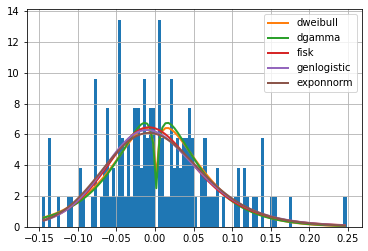

In [21]:
f = Fitter(empirical_growth)
f.fit()
f.summary()

In [22]:
### It seems that dGamma distribution iss the best. 
f.fitted_param['dweibull']

(1.217914090307231, 0.001475603922600907, 0.058252922795943546)

[-0.00190997  0.03959571  0.04878136  0.03196962 -0.02599269 -0.02366765
  0.03960953  0.02117775  0.01761419  0.03210177  0.04937519 -0.10039567
 -0.04535688 -0.02021579  0.06066005  0.02382092  0.02985518  0.14008479
 -0.03271342  0.00981067  0.01047058 -0.02277623 -0.0375004  -0.17671073
 -0.02093664 -0.02212114 -0.09557474 -0.01006274 -0.02224175  0.08990484
 -0.03016563 -0.05446902 -0.00418283 -0.01644329 -0.02855954 -0.01202936
  0.10985735  0.08441878  0.07062992 -0.16508708  0.20534508  0.03398772
  0.15320285  0.0076417  -0.1027457  -0.02430168  0.01866051  0.1436983
 -0.00432982  0.08422994 -0.10536387  0.09115999  0.03421989  0.09214136
  0.06598491 -0.13182171 -0.04291335  0.01874071  0.00246864  0.01681091
 -0.01142397 -0.02184077 -0.04222146 -0.02410214  0.10467706  0.00042368
  0.0447898  -0.01165724 -0.03772444  0.07726428  0.13067855 -0.0241452
  0.01820053  0.06702128  0.02632018  0.06895974  0.00545162  0.03940195
 -0.13352246 -0.02220693  0.02818291  0.19858271 -0.0

(array([0.22452114, 0.56130285, 0.89808456, 1.68390856, 5.27624681,
        6.96015537, 3.8168594 , 1.79616913, 0.89808456, 0.33678171]),
 array([-0.23428874, -0.18974951, -0.14521027, -0.10067104, -0.0561318 ,
        -0.01159256,  0.03294667,  0.07748591,  0.12202514,  0.16656438,
         0.21110361]),
 <BarContainer object of 10 artists>)

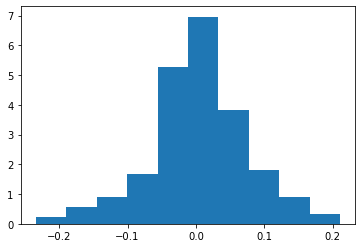

In [23]:
simulate = stats.dweibull.rvs(1.217914090307231, 0.001475603922600907, 0.058252922795943546, size=200)    
print(simulate)
plt.hist(simulate, density=True, bins=10)  # density=False would make counts

We simulate a random dgamma distribution with our parameters:

In [24]:
simulate = stats.dweibull.rvs(1.217914090307231, 0.001475603922600907, 0.058252922795943546, size=[40,10000])    
print(simulate)

[[ 0.08317436  0.0371627   0.03725814 ...  0.13585452  0.04531756
  -0.00037761]
 [ 0.04873789  0.03984829 -0.09330432 ...  0.02337701 -0.14055388
   0.11217033]
 [ 0.09331529  0.04432265  0.01694293 ...  0.05539107  0.00395383
   0.00321349]
 ...
 [-0.11575953 -0.02542572  0.01438243 ... -0.02087189  0.08564025
  -0.05515555]
 [ 0.04344182 -0.00104616 -0.00997912 ...  0.0720277   0.04952798
   0.03839802]
 [-0.00579259  0.08116917  0.02152095 ... -0.02684637  0.00460099
   0.14001326]]


An example index would be:

In [25]:
simulate[0,:] = 1 + simulate[0,:]
i = 1
while i<len(simulate[:,0]):
    simulate[i,:] = simulate[i-1,:] * (1 + simulate[i,:])
    i+=1

Average return on our last period:

In [26]:
np.mean(simulate[39,:]) ### Average number of the last observation, so growth after 10 years.

1.0598209432158563

Now we get average values, 2.5% intervals and lowest values for each prediction.

In [27]:
avg_values = []
lower_conf = []
upper_conf = []
min_values = []
max_values = []

i = 0
while i<40:
    avg_values.append(np.mean(simulate[i,:]))
    lower_conf.append(np.sort(simulate[i,:])[250])
    upper_conf.append(np.sort(simulate[i,:])[9750])
    min_values.append(min(simulate[i,:]))
    max_values.append(max(simulate[i,:]))
    i+=1

# Results

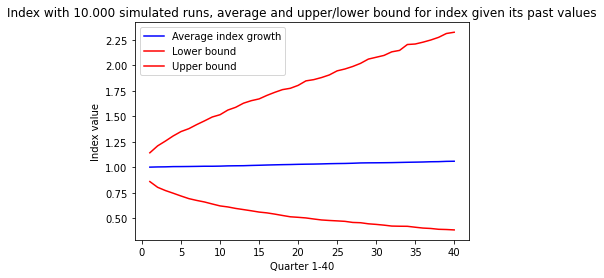

In [32]:
import matplotlib.pyplot as plt

# Define data values
x = range(1,41)


# Plot a simple line chart
plt.plot(x, avg_values,color ="b")

# Plot lower confidence interval
plt.plot(x, lower_conf,color ="r")
# Plot upper confidence interval
plt.plot(x, upper_conf,color ="r")
plt.legend(["Average index growth","Lower bound","Upper bound"],loc = "upper left")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.title("Index with 10.000 simulated runs, average and upper/lower bound for index given its past values")
plt.show()


And just for visualisation, plot of average growth of index:

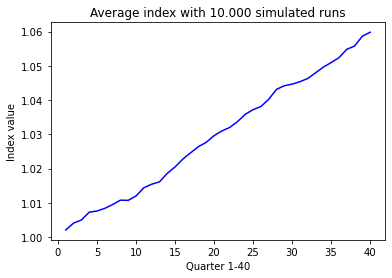

In [31]:
# Define data values
x = range(1,41)

plt.title("Average index with 10.000 simulated runs")

# Plot a simple line chart
plt.plot(x, avg_values,color ="b")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.show()


And now a randomly generated index:

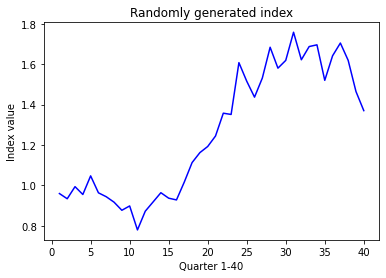

In [34]:
plt.title("Randomly generated index")

# Plot a simple line chart
plt.plot(x, simulate[:,5000],color ="b")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.show()